In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df = pd.read_csv('amazon.graph.large.csv')
df = df.drop(df.columns[0],axis=1)
x = np.array(df[df.columns[0]])
y = np.array(df[df.columns[1]])
x_new = np.linspace(x[0],x[-1], 100)

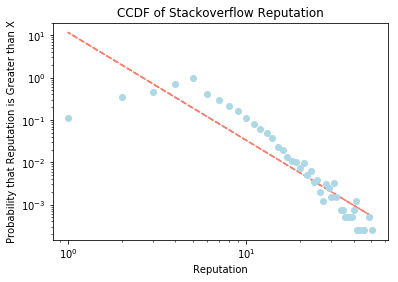

In [16]:
ccdf = y.astype(float) / y.max()

# Fit a line in log-space
logx = np.log(x)
logy = np.log(ccdf)
params = np.polyfit(logx, logy, 1)
est = np.exp(np.polyval(params, logx))

fig, ax = plt.subplots()
ax.loglog(x, ccdf, color='lightblue', ls='', marker='o',
          clip_on=False, zorder=10, label='Observations')

ax.plot(x, est, color='salmon', label='Fit', ls='--')

ax.set(xlabel='Reputation', title='CCDF of Stackoverflow Reputation',
       ylabel='Probability that Reputation is Greater than X')

plt.show()

In [17]:
import scipy.stats

In [28]:
cdfs = [
    "norm",            #Normal (Gaussian)
    "alpha",           #Alpha
    "anglit",          #Anglit
    "arcsine",         #Arcsine
    "beta",            #Beta
    "betaprime",       #Beta Prime
    "bradford",        #Bradford
    "burr",            #Burr
    "cauchy",          #Cauchy
    "chi",             #Chi
    "chi2",            #Chi-squared
    "cosine",          #Cosine
    "dgamma",          #Double Gamma
    "dweibull",        #Double Weibull
    "erlang",          #Erlang
    "expon",           #Exponential
    "exponweib",       #Exponentiated Weibull
    "exponpow",        #Exponential Power
    "fatiguelife",     #Fatigue Life (Birnbaum-Sanders)
    "foldcauchy",      #Folded Cauchy
    "f",               #F (Snecdor F)
    "fisk",            #Fisk
    "foldnorm",        #Folded Normal
    "frechet_r",       #Frechet Right Sided, Extreme Value Type II
    "frechet_l",       #Frechet Left Sided, Weibull_max
    "gamma",           #Gamma
    "gausshyper",      #Gauss Hypergeometric
    "genexpon",        #Generalized Exponential
    "genextreme",      #Generalized Extreme Value
    "gengamma",        #Generalized gamma
    "genlogistic",     #Generalized Logistic
    "genpareto",       #Generalized Pareto
    "genhalflogistic", #Generalized Half Logistic
    "gilbrat",         #Gilbrat
    "gompertz",        #Gompertz (Truncated Gumbel)
    "gumbel_l",        #Left Sided Gumbel, etc.
    "gumbel_r",        #Right Sided Gumbel
    "halfcauchy",      #Half Cauchy
    "halflogistic",    #Half Logistic
    "halfnorm",        #Half Normal
    "hypsecant",       #Hyperbolic Secant
    "invgamma",        #Inverse Gamma
    "invweibull",      #Inverse Weibull
    "johnsonsb",       #Johnson SB
    "johnsonsu",       #Johnson SU
    "laplace",         #Laplace
    "logistic",        #Logistic
    "loggamma",        #Log-Gamma
    "loglaplace",      #Log-Laplace (Log Double Exponential)
    "lognorm",         #Log-Normal
    "lomax",           #Lomax (Pareto of the second kind)
    "maxwell",         #Maxwell
    "mielke",          #Mielke's Beta-Kappa
    "nakagami",        #Nakagami
    "ncx2",            #Non-central chi-squared
#    "ncf",             #Non-central F
    "nct",             #Non-central Student's T
    "pareto",          #Pareto
    "powerlaw",        #Power-function
    "powerlognorm",    #Power log normal
    "powernorm",       #Power normal
    "rdist",           #R distribution
    "reciprocal",      #Reciprocal
    "rayleigh",        #Rayleigh
    "rice",            #Rice
    "recipinvgauss",   #Reciprocal Inverse Gaussian
    "semicircular",    #Semicircular
    "t",               #Student's T
    "triang",          #Triangular
    "truncexpon",      #Truncated Exponential
    "truncnorm",       #Truncated Normal
    "tukeylambda",     #Tukey-Lambda
    "uniform",         #Uniform
    "vonmises",        #Von-Mises (Circular)
    "wald",            #Wald
    "weibull_min",     #Minimum Weibull (see Frechet)
    "weibull_max",     #Maximum Weibull (see Frechet)
    "wrapcauchy",      #Wrapped Cauchy
    "ksone",           #Kolmogorov-Smirnov one-sided (no stats)
    "kstwobign"]       #Kolmogorov-Smirnov two-sided test for Large N

In [29]:
for cdf in cdfs:
    #fit our data set against every probability distribution
    parameters = eval("scipy.stats."+cdf+".fit(y)")
 
    #Applying the Kolmogorov-Smirnof one sided test
    D, p = scipy.stats.kstest(y, cdf, args=parameters)
 
    #pretty-print the results
    print(cdf.ljust(16) + ("p: "+str(p)).ljust(25)+"D: "+str(D))

norm            p: 9.57826614583282e-24  D: 0.708034857517402
alpha           p: 2.2890702166801685e-21D: 0.6765480297588375
anglit          p: 1.0466090631138528e-19D: 0.6528192550737694
arcsine         p: 3.105650245147426e-18 D: 0.6304347826086957
beta            p: 6.33722815476843e-22  D: 0.6841866941501349


/usr/local/lib/python3.5/dist-packages/scipy/stats/_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:389: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:514: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:666: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:670: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/usr/local/lib/python3.5/dist-packages/scipy/stats/_distn_infrastructure.py:1035: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu 

betaprime       p: 3.5692998440634896e-21D: 0.67386791172792
bradford        p: 3.105650245147426e-18 D: 0.6304347826086957
burr            p: 2.99296160872627e-21  D: 0.6749327698287331
cauchy          p: 4.890872352080328e-20 D: 0.6576646103384258
chi             p: 1.7782259157961012e-22D: 0.691588395878789
chi2            p: 4.047040433742793e-21 D: 0.6731064421883675
cosine          p: 7.977389236576752e-21 D: 0.6689650325975702
dgamma          p: 1.369640372040945e-23 D: 0.7060627884258799
dweibull        p: 1.3035643222212058e-23D: 0.7063361167678437
erlang          p: 4.047137719534643e-21 D: 0.6731062963181926
expon           p: 1.398290993286484e-20 D: 0.6655043922476542


/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:2650: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.1.
  RuntimeWarning)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:2650: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0666666666666664.
  RuntimeWarning)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:2650: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.9444444444444442.
  RuntimeWarning)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:2650: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.8666666666666663.
  RuntimeWarning)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:2650: RuntimeWarning: The shape parameter of the erlang distribution has been give

/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:1468: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


exponweib       p: 7.943534777707901e-22 D: 0.6828546768999486
exponpow        p: 3.1864861918940725e-22D: 0.6882101351831527
fatiguelife     p: 3.574009336728804e-21 D: 0.6738599269638081
foldcauchy      p: 2.512793150685015e-16 D: 0.5993323107129997
f               p: 6.4850913750257425e-21D: 0.6702338988356726
fisk            p: 1.1011377579065236e-19D: 0.6524935341757276
foldnorm        p: 1.0936634346269808e-22D: 0.6943791858121657
frechet_r       p: 1.586900392135472e-21 D: 0.6787435998128608


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`

frechet_l       p: 5.2567718682957235e-23D: 0.6985439465899745
gamma           p: 4.044879423213668e-21 D: 0.6731096832937218


/usr/local/lib/python3.5/dist-packages/scipy/stats/_distn_infrastructure.py:1625: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:3174: RuntimeWarning: invalid value encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:3174: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


gausshyper      p: 2.3855333075769203e-21D: 0.6762998261483177
genexpon        p: 4.5231830421980095e-22D: 0.6861658277333307
genextreme      p: 3.3154139969952066e-21D: 0.6743144574619779
gengamma        p: 2.75304576124596e-22  D: 0.6890599540253046
genlogistic     p: 5.35534033528695e-23  D: 0.6984389470252628


/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:2247: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


genpareto       p: 6.061517558134771e-22 D: 0.6844483762492033
genhalflogistic p: 6.932444863095826e-21 D: 0.6698256884895132
gilbrat         p: 1.3514223478416638e-18D: 0.6360521471941762
gompertz        p: 4.530096659557094e-22 D: 0.6861568887357512
gumbel_l        p: 3.0698138772780295e-23D: 0.7015705751243138
gumbel_r        p: 5.354640169781186e-23 D: 0.698439686146469
halfcauchy      p: 2.772350209950975e-14 D: 0.563023920843112
halflogistic    p: 6.212741821299064e-22 D: 0.6843034309430218
halfnorm        p: 1.095004627567593e-22 D: 0.694372176981604
hypsecant       p: 1.6966357989533e-23   D: 0.7048767755039262


/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:2929: RuntimeWarning: overflow encountered in exp
  return -sc.expm1(-np.exp(x))
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:3126: RuntimeWarning: overflow encountered in exp
  return 2.0/np.pi*np.arctan(np.exp(x))


invgamma        p: 3.593643119290763e-21 D: 0.6738267497427417
invweibull      p: 3.3090390317301004e-21D: 0.6743260979483225
johnsonsb       p: 2.511922173105468e-21 D: 0.6759891563138245
johnsonsu       p: 5.549462637014049e-21 D: 0.671185575066161
laplace         p: 2.986060335259698e-23 D: 0.701725512913423
logistic        p: 1.1312842918449144e-23D: 0.7071184769303702


/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:3559: RuntimeWarning: overflow encountered in exp
  return np.where(x > 0, 1.0-0.5*np.exp(-x), 0.5*np.exp(x))
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:4295: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


loggamma        p: 1.3706957291546065e-23D: 0.7060585289595445
loglaplace      p: 1.1683402155335844e-16D: 0.6049369048586577
lognorm         p: 5.575975722866705e-21 D: 0.6711564990460939
lomax           p: 7.790822690541225e-21 D: 0.6691102410648626
maxwell         p: 1.4100353839922333e-23D: 0.7059020119545614


/usr/local/lib/python3.5/dist-packages/scipy/stats/_distn_infrastructure.py:1618: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
/usr/local/lib/python3.5/dist-packages/scipy/stats/_distn_infrastructure.py:1618: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:4574: RuntimeWarning: overflow encountered in power
  return k*x**(k-1.0) / (1.0+x**s)**(1.0+k*1.0/s)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:4574: RuntimeWarning: overflow encountered in multiply
  return k*x**(k-1.0) / (1.0+x**s)**(1.0+k*1.0/s)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:4574: RuntimeWarning: invalid value encountered in true_divide
  return k*x**(k-1.0) / (1.0+

mielke          p: nan                   D: nan
nakagami        p: 1.1869469880127178e-22D: 0.6939107879806827
ncx2            p: 1.5178147322266617e-21D: 0.6790094443743593
nct             p: 3.2934783118374185e-21D: 0.6743546042048194
pareto          p: 1.6684152128079325e-20D: 0.6644085284602854
powerlaw        p: 3.105650245147426e-18 D: 0.6304347826086957
powerlognorm    p: 3.7012630810796795e-21D: 0.6736480010802055
powernorm       p: 0.0                   D: 1.0
rdist           p: 3.105650245147426e-18 D: 0.6304347826086957


/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:5769: RuntimeWarning: divide by zero encountered in power
  return np.power((1.0 - x**2), c / 2.0 - 1) / sc.beta(0.5, c / 2.0)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:5877: RuntimeWarning: invalid value encountered in log
  self.d = np.log(b*1.0 / a)


reciprocal      p: 3.105650245147426e-18 D: 0.6304347826086957
rayleigh        p: 1.773041750301086e-23 D: 0.7046322556778926
rice            p: 1.77264004315305e-23  D: 0.7046335139329494
recipinvgauss   p: 5.477048695652256e-21 D: 0.6712656905506895
semicircular    p: 3.105650245147426e-18 D: 0.6304347826086957
t               p: 1.6351032491487112e-23D: 0.7050817058124863
triang          p: 3.0677173039152947e-20D: 0.6606044858948105
truncexpon      p: 3.105650245147426e-18 D: 0.6304347826086957
truncnorm       p: 1.4718620586023478e-20D: 0.665186574995752


/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:6344: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:6344: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:6404: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


tukeylambda     p: 3.105650245147426e-18 D: 0.6304347826086957
uniform         p: 3.105650245147426e-18 D: 0.6304347826086957
vonmises        p: nan                   D: 5.493885426567166e+30
wald            p: 2.0417540802453014e-19D: 0.6485107570422202
weibull_min     p: 1.586900392135472e-21 D: 0.6787435998128608
weibull_max     p: 5.2567718682957235e-23D: 0.6985439465899745
wrapcauchy      p: nan                   D: nan


/usr/local/lib/python3.5/dist-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:78: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:81: RuntimeWarning: floating point number truncated to an integer
  return scu._smirnovc(n, x)


ksone           p: nan                   D: nan
kstwobign       p: 3.410524958227297e-23 D: 0.7009804308626046
